### Block particle filter

* Algorithm 2 of https://projecteuclid.org/download/pdfview_1/euclid.aoap/1438261054

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *

In [20]:
T = 100
I = 20  # number of locations
J = 10  # number of species
K = 2   # number of latent factors

In [21]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [25]:
n_particles = 1_000
particles_block, weights_block = block_pf(Y, x_0, n_particles, theta)

100%|██████████| 100/100 [00:19<00:00,  5.06it/s]


In [26]:
particles_bootstrap, _ = bootstrap_pf_track(Y, x_0, n_particles, theta)

100%|██████████| 100/100 [00:02<00:00, 40.97it/s]


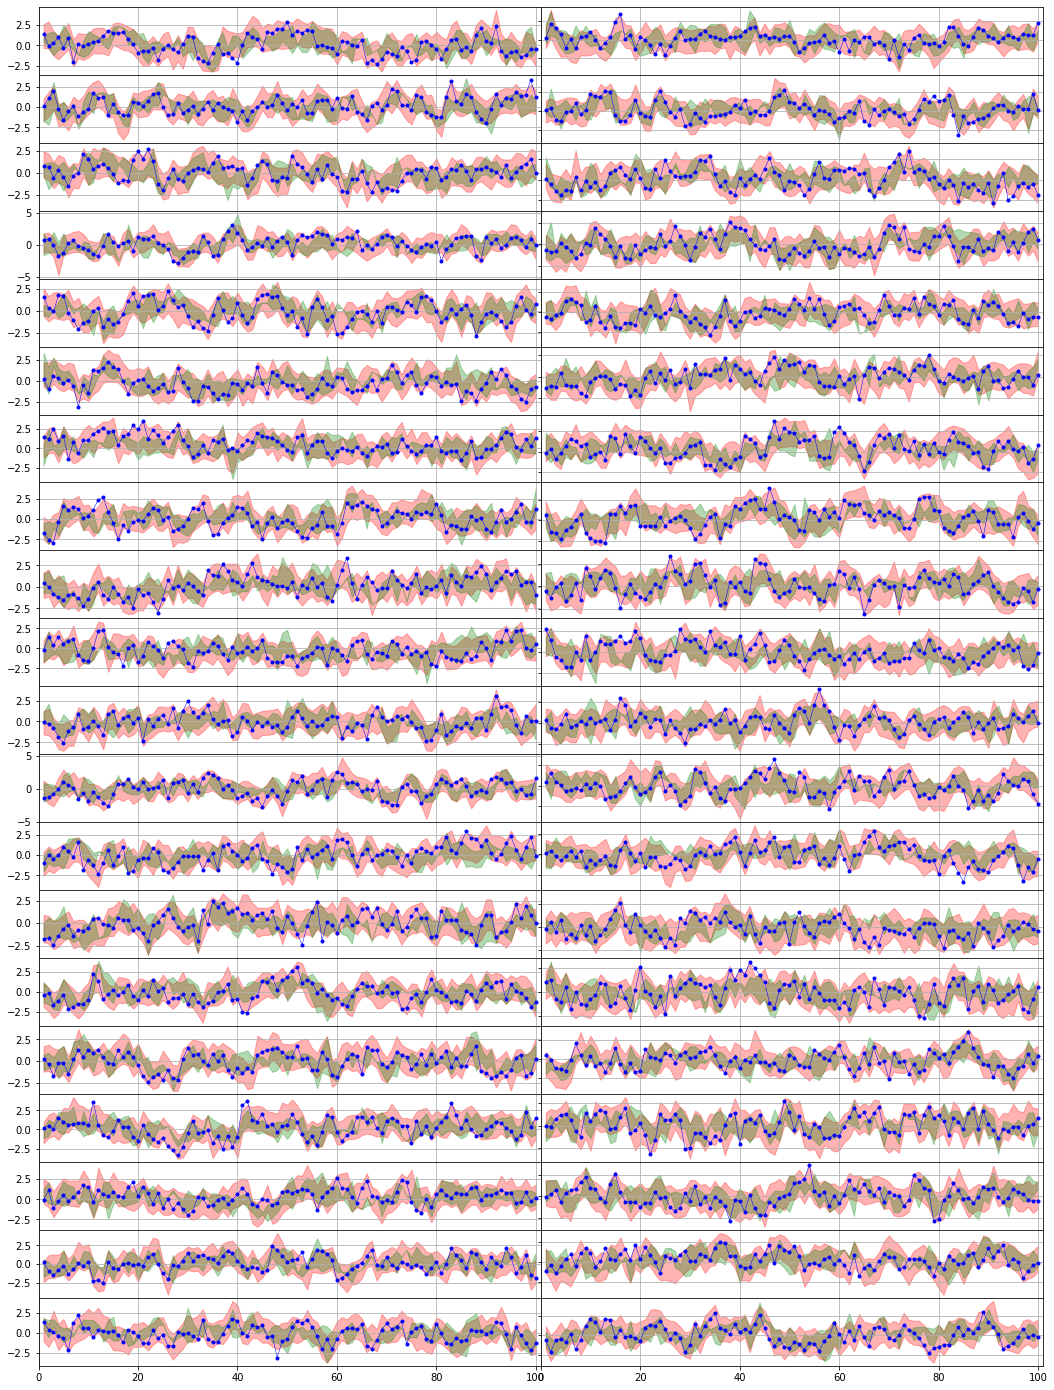

In [29]:
plt.rcParams['figure.figsize'] = (18, 25)
for i in range(I) :
    for k in range(K) :
        idx = i*K + k + 1
        plt.subplot(I,K,idx)
        ci_block = np.percentile(particles_block[1:,:,i,k], axis=1, q=[2.5,97.5])
        ci_bootstrap = np.percentile(particles_bootstrap[1:,i,k,:], axis=1, q=[2.5,97.5])
        plt.rcParams['figure.figsize'] = (16, 3.5)
        plt.plot(np.arange(1,T+1), X[1:,i,k], 'bo-', markersize=3, lw=0.5)
        plt.fill_between(np.arange(1,T+1), ci_block[0], ci_block[1], color='red', alpha=.3)
        plt.fill_between(np.arange(1,T+1), ci_bootstrap[0], ci_bootstrap[1], color='green', alpha=.3)
        plt.grid(True)
        plt.xlim(0,T+1)
        if i < (I-1) : plt.xticks(alpha=0)
        if k == (K-1) : plt.yticks(alpha=0)
        plt.subplots_adjust(hspace=0,wspace=0)

In [30]:
T, I, J = np.shape(Y)
particles, weights, logNC = np.zeros((*np.shape(x_0),n_particles)), np.ones(n_particles)/n_particles, 0.
for n in range(n_particles) :
    particles[:,:,n] = x_0

In [31]:
t = 0
y = Y[t]

In [33]:
reg = np.zeros((J,n_particles,I))
for j in range(J) :
    reg[j] = alpha[j] + lmbda[j].dot(particles.transpose())
prob = (1/(1+np.exp(-reg))).transpose()
np.asarray([np.prod((prob[:,i,:]**y)*(1-prob[:,i,:])**(1-y)) for i in range(n_particles)])

array([1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
       1.32726879e-52, 1.32726879e-52, 1.32726879e-52, 1.32726879e-52,
      

In [56]:
pp = np.reshape(prob,[I,J,n_particles])
yy = np.reshape(y,[*np.shape(y),1])

In [47]:
np.shape(prob)

(20, 1000, 10)

In [59]:
np.shape(np.prod(pp**yy*(1-pp)**(1-yy),0))

(10, 1000)

In [34]:
np.shape(((prob[:,i,:]**y)*(1-prob[:,i,:])**(1-y)))

(20, 10)

In [49]:
a = npr.rand(2,3,3)
b = npr.rand(2,3,1)
a+b

array([[[1.50913082, 1.57528889, 1.1457734 ],
        [0.68566523, 1.28202856, 0.9537816 ],
        [1.37382774, 1.06236113, 1.00490294]],

       [[1.94731028, 1.53957756, 1.41711273],
        [0.8183983 , 0.62947301, 1.50411813],
        [0.96910708, 1.22251173, 0.5790753 ]]])

In [45]:
a

array([[[0.48777245, 0.50605468, 0.87681553],
        [0.91564507, 0.15914497, 0.24664132],
        [0.07908388, 0.57665212, 0.96988595]],

       [[0.3458531 , 0.28042462, 0.92870964],
        [0.73934879, 0.09071011, 0.92429115],
        [0.91276239, 0.71799621, 0.28654785]]])

In [46]:
b

array([[[0.6925943 ]],

       [[0.87370051]]])

In [62]:
a = npr.rand(10,10)
np.linalg.norm(a)

5.625236667151827

In [63]:
a = npr.rand(10,10,10)
np.sum(a,(0,1))

array([52.4928307 , 52.58249542, 47.12860229, 50.2708615 , 50.56820223,
       54.9620042 , 48.05864142, 52.86822665, 53.12249215, 47.93745188])